# TO DO:
- add goals
- add docstrings and comments
- add error messages/warnings, e.g. length/width ignored apart from tracab and tracab needs this.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class Pitch(object):
    
    _pitch_dimensions = ['left','right','bottom','top','width','center_width','length','center_length',
                         'six_yard_from_side','six_yard_width','six_yard_length',
                         'penalty_area_from_side','penalty_area_width','penalty_area_length',
                         'left_penalty','right_penalty','circle_size',
                         'goal_width','goal_depth','goal_post',
                         'arc1_leftV','arc2_leftV','arc1_rightV','arc2_rightV',
                         'arc1_leftH','arc2_leftH','arc1_rightH','arc2_rightH']                         
    
    _opta_dimensions = {'left':100,'right':0,'bottom':0,'top':100,
                        'width':100,'center_width':50,'length':100,'center_length':50,
                        'six_yard_from_side':36.8,'six_yard_width':26.4,'six_yard_length':5.8,
                        'penalty_area_from_side':21.1,'penalty_area_width':57.8,'penalty_area_length':17.0,
                        'left_penalty':11.5,'right_penalty':88.5,'circle_size':9.15,
                        'goal_depth':2,'goal_width':10.76,'goal_post':44.62,
                        'arc1_leftV':None,'arc2_leftV':None,'arc1_rightV':None,'arc2_rightV':None,
                        'arc1_leftH':None,'arc2_leftH':None,'arc1_rightH':None,'arc2_rightH':None}
    
    _statsbomb_dimensions = {'left':0,'right':80,'bottom':0,'top':120,
                             'width':80,'center_width':40,'length':120,'center_length':60,
                             'six_yard_from_side':30,'six_yard_width':20,'six_yard_length':6,
                             'penalty_area_from_side':18,'penalty_area_width':44,'penalty_area_length':18,
                             'left_penalty':12,'right_penalty':108,'circle_size':10.46,
                             'goal_depth':2,'goal_width':8,'goal_post':44,
                             'arc1_leftV':35,'arc2_leftV':145,'arc1_rightV':215,'arc2_rightV':325,
                             'arc1_leftH':305,'arc2_leftH':55,'arc1_rightH':125,'arc2_rightH':235}
    
    _tracab_dimensions = {'left':None,'right':None,'bottom':None,'top':None,
                          'width':None,'center_width':0,'length':None,'center_length':0,
                          'six_yard_from_side':-916,'six_yard_width':1832,'six_yard_length':550,
                          'penalty_area_from_side':-2016,'penalty_area_width':4032,'penalty_area_length':1650,
                          'left_penalty':None,'right_penalty':None,'circle_size':915,
                          'goal_depth':200,'goal_width':732,'goal_post':-366,
                          'arc1_leftV':36.95,'arc2_leftV':143.05,'arc1_rightV':216.95,'arc2_rightV':323.05,
                          'arc1_leftH':306.95,'arc2_leftH':53.05,'arc1_rightH':126.95,'arc2_rightH':233.05}  
     
    def __init__(self, *args, line_color='white', pitch_color='#aabb97', pitch_type='opta',
                 orientation='horizontal',view='full',xpad=(2,2),ypad=(2,2),lw=1.5,pitch_length=None,
                 pitch_width=None,figsize=None, layout=None,**kwargs):
        
                
        # set figure and axes attributes
        self.axes = None
        self.fig = None
        self.figsize = figsize
        self.layout = layout

        # set attributes
        self.line_color = line_color
        self.pitch_color = pitch_color
        self.pitch_length = pitch_length
        self.pitch_width = pitch_width
        self.lw = lw
        self.pitch_type = pitch_type      
        self.orientation = orientation
        self.view = view
        self.xpad_left, self.xpad_right = xpad
        self.ypad_left, self.ypad_right = ypad   
        
        # set pitch dimensions
        if pitch_type=='opta':
            for attr in self._pitch_dimensions:
                setattr(self, attr, self._opta_dimensions.get(attr, None))
            self.aspect = 68/105
            
        if pitch_type=='statsbomb':
            for attr in self._pitch_dimensions:
                setattr(self, attr, self._statsbomb_dimensions.get(attr, None))
            self.aspect = 1
            
        if pitch_type=='tracab':
            for attr in self._pitch_dimensions:
                setattr(self, attr, self._tracab_dimensions.get(attr, None))
            self.aspect = 1
            self.left = pitch_width/2 * 100
            self.right = -(pitch_width/2) * 100
            self.bottom = -(pitch_length/2) * 100
            self.top = (pitch_length/2)*100
            self.width = pitch_width*100
            self.length = pitch_length * 100
            self.left_penalty = self.bottom + 1100
            self.right_penalty = self.top - 1100
            self.xpad_left = self.xpad_left*100
            self.ypad_left = self.ypad_left*100
            self.xpad_right = self.xpad_right*100
            self.ypad_right = self.ypad_right*100      
            
    def _setup_subplots(self):
        
        if self.layout == None:
            nrows = 1
            ncols = 1            
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=self.figsize)
            axes = np.array([axes])
        
        else:
            nrows, ncols = self.layout
            if nrows>1 or ncols>1:
                fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=self.figsize)
                axes = axes.ravel()
            else:
                fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=self.figsize)
                axes = np.array([axes])
                
        self.fig = fig
        self.axes = axes
        
                 
    def _set_axes(self):
        # set up vertical pitch
        if self.orientation=='vertical':
            if self.view=='full':
                for ax in self.axes:
                    ax.set_aspect(1/self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_xlim(self.left-self.xpad_left,self.right+self.xpad_right)
                    else:
                        ax.set_xlim(self.left+self.xpad_left,self.right-self.xpad_right)
                    ax.set_ylim(self.bottom-self.ypad_right,self.top+self.ypad_left,)
            if self.view=='half':
                for ax in self.axes:
                    ax.set_aspect(1/self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_xlim(self.left-self.xpad_left,self.right+self.xpad_right)
                    else:
                        ax.set_xlim(self.left+self.xpad_left,self.right-self.xpad_right)
                    ax.set_ylim(self.center_length-self.ypad_right,self.top+self.ypad_left)
        # set up horizontal pitch
        if self.orientation=='horizontal':
            if self.view=='full':
                for ax in self.axes:
                    ax.set_aspect(self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_ylim(self.right+self.ypad_left,self.left-self.ypad_right)
                    else:
                        ax.set_ylim(self.right-self.ypad_left,self.left+self.ypad_right)
                    ax.set_xlim(self.bottom-self.xpad_left,self.top+self.xpad_right)
            if self.view=='half':
                for ax in self.axes:
                    ax.set_aspect(self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_ylim(self.right+self.ypad_left,self.left-self.ypad_right)
                    else:
                        ax.set_ylim(self.right-self.ypad_left,self.left+self.ypad_right)
                    ax.set_xlim(self.center_length-self.xpad_left,self.top+self.xpad_right)       
    
    def _draw_pitch_lines(self):
        for ax in self.axes:
            if self.orientation=='horizontal':
                if self.pitch_type=='statsbomb':
                    pitch_markings = patches.Rectangle((self.bottom,self.left),self.length,self.width,
                                                       fill=False,lw=self.lw,color=self.line_color)
                else:
                    pitch_markings = patches.Rectangle((self.bottom,self.right),self.length,self.width,
                                                       fill=False,lw=self.lw,color=self.line_color)
                midline = patches.ConnectionPatch([self.center_length,self.left],
                                                  [self.center_length,self.right],'data','data',
                                                  lw=self.lw,color=self.line_color)
            if self.orientation=='vertical':
                if self.pitch_type=='statsbomb':
                    pitch_markings = patches.Rectangle((self.left,self.bottom),self.width,self.length,
                                                   fill=False,lw=self.lw,color=self.line_color)  
                else:
                    pitch_markings = patches.Rectangle((self.right,self.bottom),self.width,self.length,
                                                       fill=False,lw=self.lw,color=self.line_color)
                midline = patches.ConnectionPatch([self.left,self.center_length],
                                                  [self.right,self.center_length],'data','data',
                                                  lw=self.lw,color=self.line_color)
            ax.add_patch(pitch_markings)
            ax.add_patch(midline)
            
    def _boxes(self,box_from_side,box_length,box_width,ax):
        if self.orientation=='horizontal':
            box1 = patches.Rectangle((self.bottom,box_from_side),box_length,box_width,
                                     fill=False,lw=self.lw,color=self.line_color)
            box2 = patches.Rectangle((self.top-box_length,box_from_side),box_length,box_width,
                                     fill=False,lw=self.lw,color=self.line_color)
        if self.orientation=='vertical':
            box1 = patches.Rectangle((box_from_side,self.bottom),box_width,box_length,
                                     fill=False,lw=self.lw,color=self.line_color)
            box2 = patches.Rectangle((box_from_side,self.top-box_length),box_width,box_length,
                                     fill=False,lw=self.lw,color=self.line_color)
        ax.add_patch(box1)
        ax.add_patch(box2)
        
             
    def _draw_boxes(self):
        for ax in self.axes:
            self._boxes(self.six_yard_from_side,self.six_yard_length,self.six_yard_width,ax)
            self._boxes(self.penalty_area_from_side,self.penalty_area_length,self.penalty_area_width,ax)
            
    def _draw_circles_and_arcs(self):
        if self.aspect==1:
            size_spot = 0.005 * self.length
            if self.orientation=='vertical':
                xy = (self.center_width,self.center_length)
                center = (self.center_width,self.center_length)
                penalty1 = (self.center_width,self.left_penalty)
                penalty2 = (self.center_width,self.right_penalty)
                arc1_theta1 = self.arc1_leftV
                arc1_theta2 = self.arc2_leftV
                arc2_theta1 = self.arc1_rightV
                arc2_theta2 = self.arc2_rightV
                
            if self.orientation=='horizontal':
                xy = (self.center_length,self.center_width)
                center = (self.center_length,self.center_width)
                penalty1 = (self.left_penalty,self.center_width)
                penalty2 = (self.right_penalty,self.center_width)
                arc1_theta1 = self.arc1_leftH
                arc1_theta2 = self.arc2_leftH
                arc2_theta1 = self.arc1_rightH
                arc2_theta2 = self.arc2_rightH                

            for ax in self.axes:
                circle = patches.Circle(xy,self.circle_size,lw=self.lw,color=self.line_color, fill=False)
                center_spot = patches.Circle(center,size_spot,color=self.line_color)
                penalty1_spot = patches.Circle(penalty1,size_spot,color=self.line_color)
                penalty2_spot = patches.Circle(penalty2,size_spot,color=self.line_color)
                arc1_patch = patches.Arc(penalty1,self.circle_size*2,self.circle_size*2,
                                         theta1=arc1_theta1,theta2=arc1_theta2,
                                         lw=self.lw,color=self.line_color,fill=False)
                arc2_patch = patches.Arc(penalty2,self.circle_size*2,self.circle_size*2,
                                         theta1=arc2_theta1,theta2=arc2_theta2,
                                         lw=self.lw,color=self.line_color,fill=False)
                ax.add_patch(circle)
                ax.add_patch(center_spot)
                ax.add_patch(penalty1_spot)  
                ax.add_patch(penalty2_spot)  
                ax.add_patch(arc1_patch)
                ax.add_patch(arc2_patch)  
                
        else:
            scaled_circle1 = self.circle_size*100/68
            scaled_circle2 = self.circle_size*100/105
            scaled_spot1 = self.length/136
            scaled_spot2 = self.length/210
            xy = (self.center_width,self.center_length)
            
            if self.orientation=='vertical':
                xy1 = (self.center_width+scaled_circle1,self.center_length)
                xy2 = (self.center_width,self.center_length+scaled_circle2)
                spot1 = (self.center_width,self.left_penalty)
                spot2 = (self.center_width,self.right_penalty)
                center_spot = (self.center_width,self.center_length)
                arc_pen_top1 = (self.center_width-10.745292702287907,self.penalty_area_length)
                p1 = (self.center_width+scaled_spot1,self.left_penalty)
                p2 = (self.center_width,self.left_penalty+scaled_spot2)

            if self.orientation=='horizontal':
                xy2 = (self.center_width,self.center_length+scaled_circle1)
                xy1 = (self.center_width+scaled_circle2,self.center_length)
                spot1 = (self.left_penalty,self.center_width)
                spot2 = (self.right_penalty,self.center_width)
                center_spot = (self.center_length,self.center_width)
                arc_pen_top1 = (self.penalty_area_length,self.center_width-10.745292702287907)
                p2 = (self.left_penalty,self.center_width+scaled_spot1)
                p1 = (self.left_penalty+scaled_spot2,self.center_width)
                   
            for ax in self.axes:
                ax_coordinate_system = ax.transAxes
                ax_xy = ax_coordinate_system.inverted().transform(ax.transData.transform_point(xy))
                ax_spot1 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(spot1))
                ax_spot2 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(spot2))
                ax_center = ax_coordinate_system.inverted().transform(ax.transData.transform_point(center_spot))
                ax_xy1 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(xy1))
                ax_xy2 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(xy2))
                ax_p1 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(p1))
                ax_p2 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(p2))
                ax_arc_pen_top1 = ax_coordinate_system.inverted().transform(ax.transData.transform_point(arc_pen_top1))
                diameter1 = (ax_xy1[0] - ax_xy[0])*2
                diameter2 = (ax_xy2[1] - ax_xy[1])*2
                diameter_spot1 = (ax_p1[0] - ax_spot1[0])*2
                diameter_spot2 = (ax_p2[1] - ax_spot1[1])*2
                
                if self.orientation=='vertical':
                    a = ax_spot1[0] - ax_arc_pen_top1[0]
                    o = ax_arc_pen_top1[1] - ax_spot1[1]
                    arc1_left = np.degrees(np.arctan(o/a))
                    arc1_right = 180 - arc1_left
                    arc2_left = 180 + arc1_left
                    arc2_right = 360 - arc1_left
                    
                if self.orientation=='horizontal':
                    a = ax_arc_pen_top1[0] - ax_spot1[0]
                    o = ax_spot1[1] - ax_arc_pen_top1[1]  
                    arc1_right = np.degrees(np.arctan(o/a))
                    arc1_left = 360 - arc1_right
                    arc2_left = 180 - arc1_right
                    arc2_right = 180 + arc1_right
                
                circle = patches.Ellipse(ax_xy, diameter1, diameter2,transform=ax_coordinate_system,fill=False,
                                         lw=self.lw,color=self.line_color)
                penalty_spot1 = patches.Ellipse(ax_spot1, diameter_spot1, diameter_spot2,
                                                transform=ax_coordinate_system,
                                                lw=self.lw,color=self.line_color)
                penalty_spot2 = patches.Ellipse(ax_spot2, diameter_spot1, diameter_spot2,
                                                transform=ax_coordinate_system,
                                                lw=self.lw,color=self.line_color)
                kick_off_spot = patches.Ellipse(ax_center, diameter_spot1, diameter_spot2,
                                                transform=ax_coordinate_system,
                                                lw=self.lw,color=self.line_color)
                arc1_patch = patches.Arc(ax_spot1,diameter1, diameter2,transform=ax_coordinate_system,fill=False,
                                         theta1=arc1_left,theta2=arc1_right,
                                         lw=self.lw,color=self.line_color)
                arc2_patch = patches.Arc(ax_spot2,diameter1, diameter2,transform=ax_coordinate_system,fill=False,
                                         theta1=arc2_left,theta2=arc2_right,
                                         lw=self.lw,color=self.line_color)
                
                ax.add_patch(penalty_spot1)
                ax.add_patch(penalty_spot2)
                ax.add_patch(kick_off_spot)
                ax.add_patch(circle)
                ax.add_patch(arc1_patch)     
                ax.add_patch(arc2_patch)     

    def draw(self):
        self._setup_subplots()
        self._set_axes()
        self._draw_pitch_lines()
        self._draw_boxes()
        self._draw_circles_and_arcs()

# Opta

#### Opta vertical full

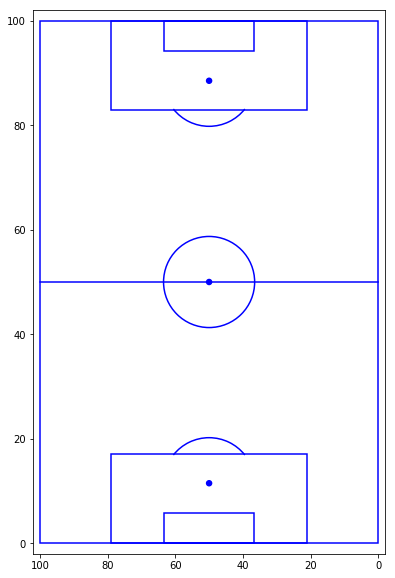

In [2]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

#### Opta horizontal full

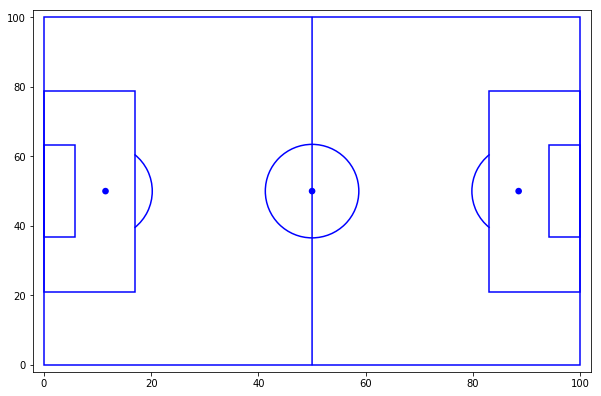

In [3]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

#### Opta vertical half

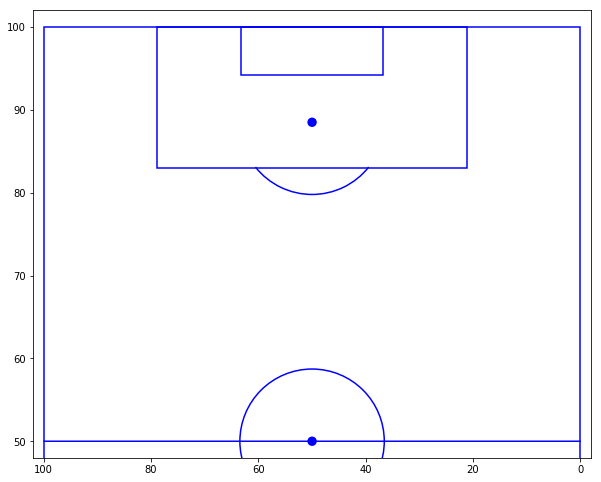

In [4]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

#### Opta Horizontal half

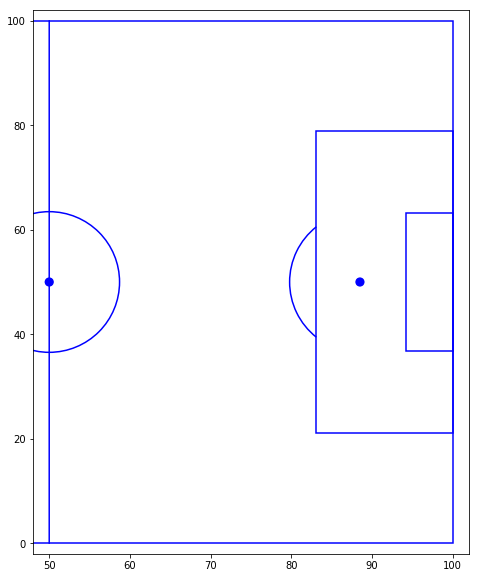

In [5]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

# Statsbomb

#### Statsbomb vertical full

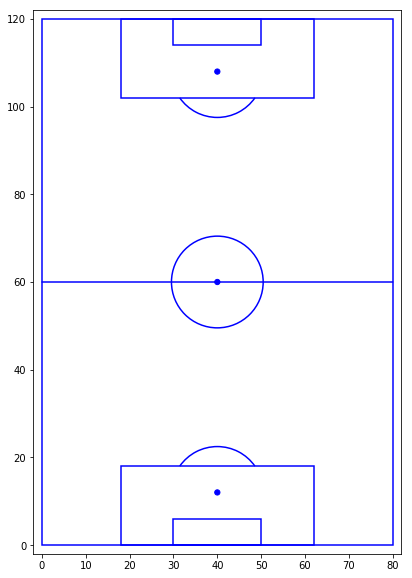

In [6]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

#### Statsbomb horizontal full

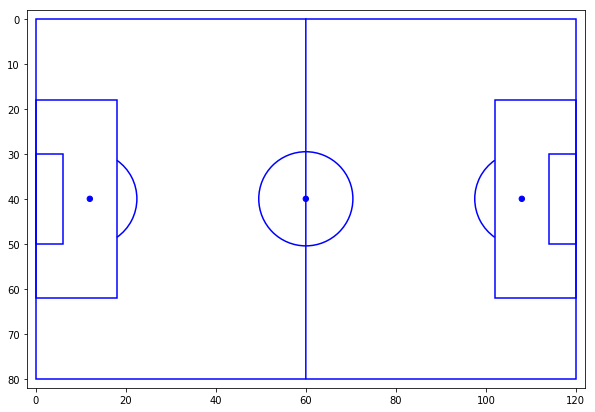

In [7]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

#### Statsbomb vertical half

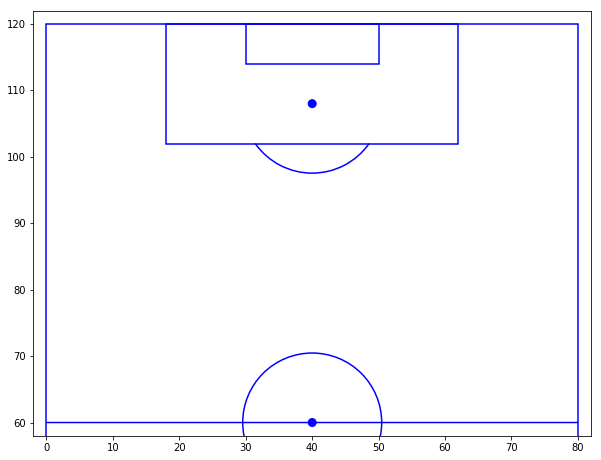

In [8]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

#### Statsbomb Horizontal half

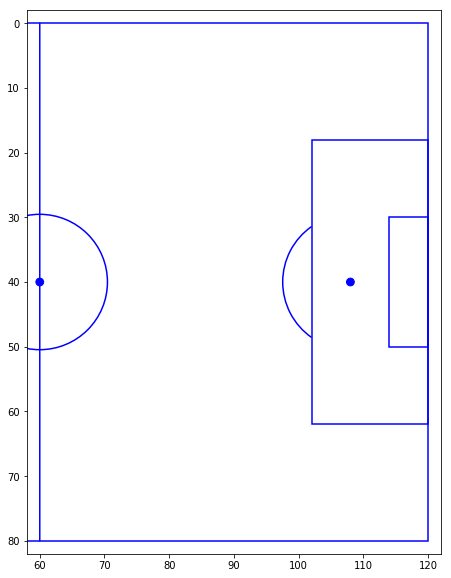

In [9]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',line_color='blue',layout=(1,1),figsize=(10,10))
pitch.draw()

# Tracab

#### Tracab vertical full

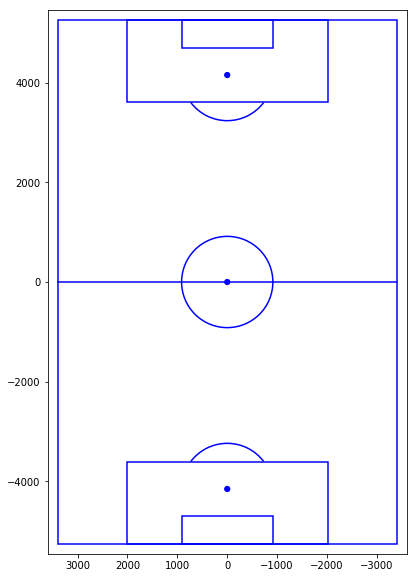

In [10]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',line_color='blue',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105)
pitch.draw()

#### Tracab horizontal full

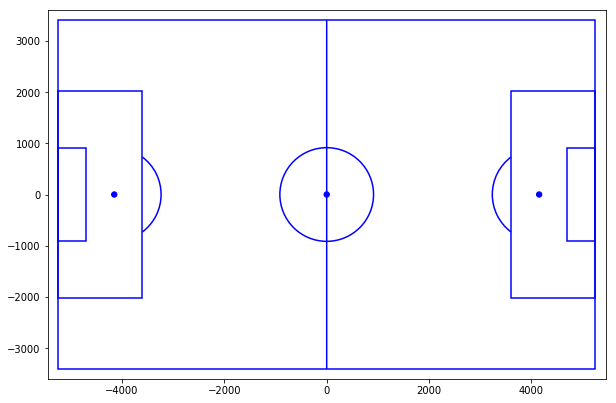

In [11]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',line_color='blue',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105)
pitch.draw()

#### Tracab vertical half

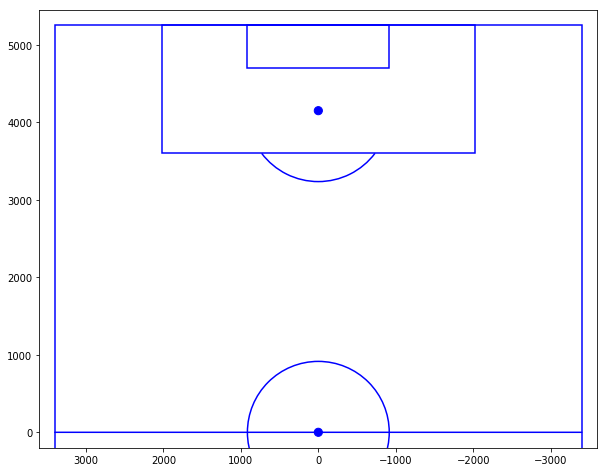

In [12]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',line_color='blue',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105)
pitch.draw()

#### Tracab Horizontal half

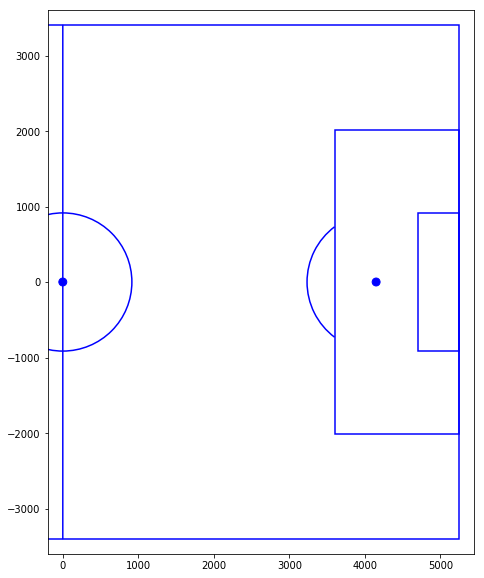

In [13]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',line_color='blue',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105)
pitch.draw()